# Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numpy version :  1.21.6
pandas version :  1.3.5
seaborn version :  0.11.2


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project Portfolio/Customer Segmentation/Project Beli Food Customer Segmentation/data-customer.csv', parse_dates= [1, 2])
df.head(15)

,customer_id,First Time,Recent Time,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime
0,1269647,2015-06-29 10:57:00,2015-12-10 02:18:00,212,6.0,43.0,138808,4291,26853,1.6,51
1,167631,2015-07-04 15:39:00,2015-12-15 14:42:00,211,8.0,19.0,56404,1925,4177,2.2,42
2,301524,2015-06-26 09:56:00,2015-12-09 20:45:00,189,9.0,33.0,36020,1772,6404,2.5,57
3,1268254,2015-07-01 01:51:00,2015-12-14 01:43:00,184,6.0,37.0,32489,975,7110,3.1,55
4,357161,2015-07-11 18:34:00,2015-12-19 23:26:00,182,4.0,23.0,85150,1738,9958,2.4,36
5,1294857,2015-06-15 09:00:00,2015-11-25 14:01:00,171,8.0,27.0,55597,1710,8436,1.6,31
6,387095,2015-07-27 12:18:00,2015-12-27 05:50:00,168,13.0,43.0,19055,1231,4014,2.1,48
7,785080,2015-07-24 22:27:00,2015-12-25 09:23:00,160,NaN,25.0,39588,0,6705,1.8,16
8,1288527,2015-07-13 07:02:00,2015-12-25 20:47:00,160,7.0,40.0,4343,215,1060,2.1,49
9,1111111,2015-06-11 06:06:00,2015-11-21 02:45:00,158,1.0,28.0,15279,94,3336,2.1,54


# Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   customer_id                  10000 non-null  int64         
 1   First Time                   10000 non-null  datetime64[ns]
 2   Recent Time                  10000 non-null  datetime64[ns]
 3   # of Orders                  10000 non-null  int64         
 4   # of Orders in last 7 days   1923 non-null   float64       
 5   # of Orders in last 4 weeks  4341 non-null   float64       
 6   Amount                       10000 non-null  int64         
 7   Amount in last 7 days        10000 non-null  int64         
 8   Amount in last 4 weeks       10000 non-null  int64         
 9   Avg_DistanceFromResturant    10000 non-null  float64       
 10  Avg_DeliveryTime             10000 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(6)

# Data Preparation

## Missing values

In [ ]:
df.isnull().sum()

customer_id                       0
First Time                        0
Recent Time                       0
# of Orders                       0
# of Orders in last 7 days     8077
# of Orders in last 4 weeks    5659
Amount                            0
Amount in last 7 days             0
Amount in last 4 weeks            0
Avg_DistanceFromResturant         0
Avg_DeliveryTime                  0
dtype: int64

In [ ]:
df['# of Orders in last 7 days'][df['# of Orders in last 7 days'].isnull()] = 0
df['# of Orders in last 4 weeks'][df['# of Orders in last 4 weeks'].isnull()] = 0

In [ ]:
df.isnull().sum()

customer_id                    0
First Time                     0
Recent Time                    0
# of Orders                    0
# of Orders in last 7 days     0
# of Orders in last 4 weeks    0
Amount                         0
Amount in last 7 days          0
Amount in last 4 weeks         0
Avg_DistanceFromResturant      0
Avg_DeliveryTime               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   customer_id                  10000 non-null  int64         
 1   First Time                   10000 non-null  datetime64[ns]
 2   Recent Time                  10000 non-null  datetime64[ns]
 3   # of Orders                  10000 non-null  int64         
 4   # of Orders in last 7 days   10000 non-null  float64       
 5   # of Orders in last 4 weeks  10000 non-null  float64       
 6   Amount                       10000 non-null  int64         
 7   Amount in last 7 days        10000 non-null  int64         
 8   Amount in last 4 weeks       10000 non-null  int64         
 9   Avg_DistanceFromResturant    10000 non-null  float64       
 10  Avg_DeliveryTime             10000 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(6)

## Duplicated values

In [ ]:
df.duplicated().sum()

0

## Drop coloumn data 

In [ ]:
df.head(10)

,customer_id,First Time,Recent Time,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime
0,1269647,2015-06-29 10:57:00,2015-12-10 02:18:00,212,6.0,43.0,138808,4291,26853,1.6,51
1,167631,2015-07-04 15:39:00,2015-12-15 14:42:00,211,8.0,19.0,56404,1925,4177,2.2,42
2,301524,2015-06-26 09:56:00,2015-12-09 20:45:00,189,9.0,33.0,36020,1772,6404,2.5,57
3,1268254,2015-07-01 01:51:00,2015-12-14 01:43:00,184,6.0,37.0,32489,975,7110,3.1,55
4,357161,2015-07-11 18:34:00,2015-12-19 23:26:00,182,4.0,23.0,85150,1738,9958,2.4,36
5,1294857,2015-06-15 09:00:00,2015-11-25 14:01:00,171,8.0,27.0,55597,1710,8436,1.6,31
6,387095,2015-07-27 12:18:00,2015-12-27 05:50:00,168,13.0,43.0,19055,1231,4014,2.1,48
7,785080,2015-07-24 22:27:00,2015-12-25 09:23:00,160,0.0,25.0,39588,0,6705,1.8,16
8,1288527,2015-07-13 07:02:00,2015-12-25 20:47:00,160,7.0,40.0,4343,215,1060,2.1,49
9,1111111,2015-06-11 06:06:00,2015-11-21 02:45:00,158,1.0,28.0,15279,94,3336,2.1,54


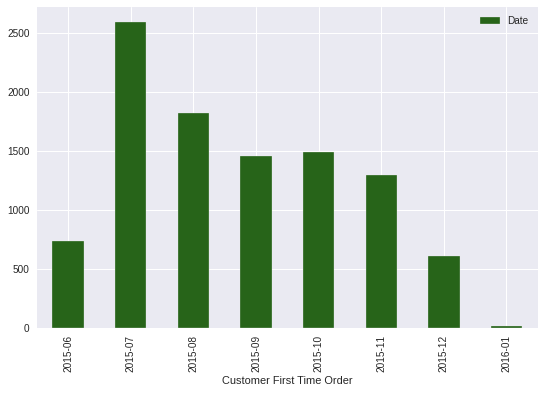

In [ ]:
# convert column to datetime
df['First Time'] = pd.to_datetime(df['First Time'])

# create a representation of the month with strfmt
df['Customer First Time Order'] = df['First Time'].map(lambda dt: dt.strftime('%Y-%m'))

grouped_df = df.groupby('Customer First Time Order').size().to_frame("Date").reset_index()

grouped_df.plot(kind='bar', x='Customer First Time Order', y='Date', colormap='PiYG_r')

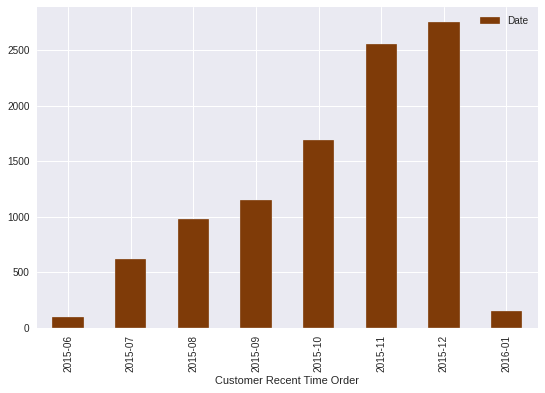

In [ ]:
# convert column to datetime
df['Recent Time'] = pd.to_datetime(df['Recent Time'])

# create a representation of the month with strfmt
df['Customer Recent Time Order'] = df['Recent Time'].map(lambda dt: dt.strftime('%Y-%m'))

grouped_df = df.groupby('Customer Recent Time Order').size().to_frame("Date").reset_index()

grouped_df.plot(kind='bar', x='Customer Recent Time Order', y='Date', colormap='PuOr')

In [ ]:
df = df.drop(['customer_id','First Time', 'Recent Time'], axis=1)
# Data kolom diatas akan didrop karena data tersebut tidak berdampat pada pengolahan
df.head(5)

,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime
0,212,6.0,43.0,138808,4291,26853,1.6,51
1,211,8.0,19.0,56404,1925,4177,2.2,42
2,189,9.0,33.0,36020,1772,6404,2.5,57
3,184,6.0,37.0,32489,975,7110,3.1,55
4,182,4.0,23.0,85150,1738,9958,2.4,36


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   # of Orders                  10000 non-null  int64  
 1   # of Orders in last 7 days   10000 non-null  float64
 2   # of Orders in last 4 weeks  10000 non-null  float64
 3   Amount                       10000 non-null  int64  
 4   Amount in last 7 days        10000 non-null  int64  
 5   Amount in last 4 weeks       10000 non-null  int64  
 6   Avg_DistanceFromResturant    10000 non-null  float64
 7   Avg_DeliveryTime             10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


# Exploratory Data Analysis (EDA)

## Statistical Summary

In [ ]:
df.describe()

,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,7.006200,0.333600,1.388100,2253.273600,109.497500,455.491200,2.35620,36.914300
std,13.118619,0.910052,3.041842,5136.484499,397.055277,1237.872749,0.97492,13.175413
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.80000,15.000000
25%,1.000000,0.000000,0.000000,279.000000,0.000000,0.000000,1.70000,26.000000
50%,2.000000,0.000000,0.000000,688.000000,0.000000,0.000000,2.40000,36.500000
75%,7.000000,0.000000,1.000000,2040.000000,0.000000,398.000000,3.02500,47.000000
max,212.000000,14.000000,46.000000,138808.000000,10150.000000,26853.000000,5.90000,83.000000


## Numeric Distribution and oulier

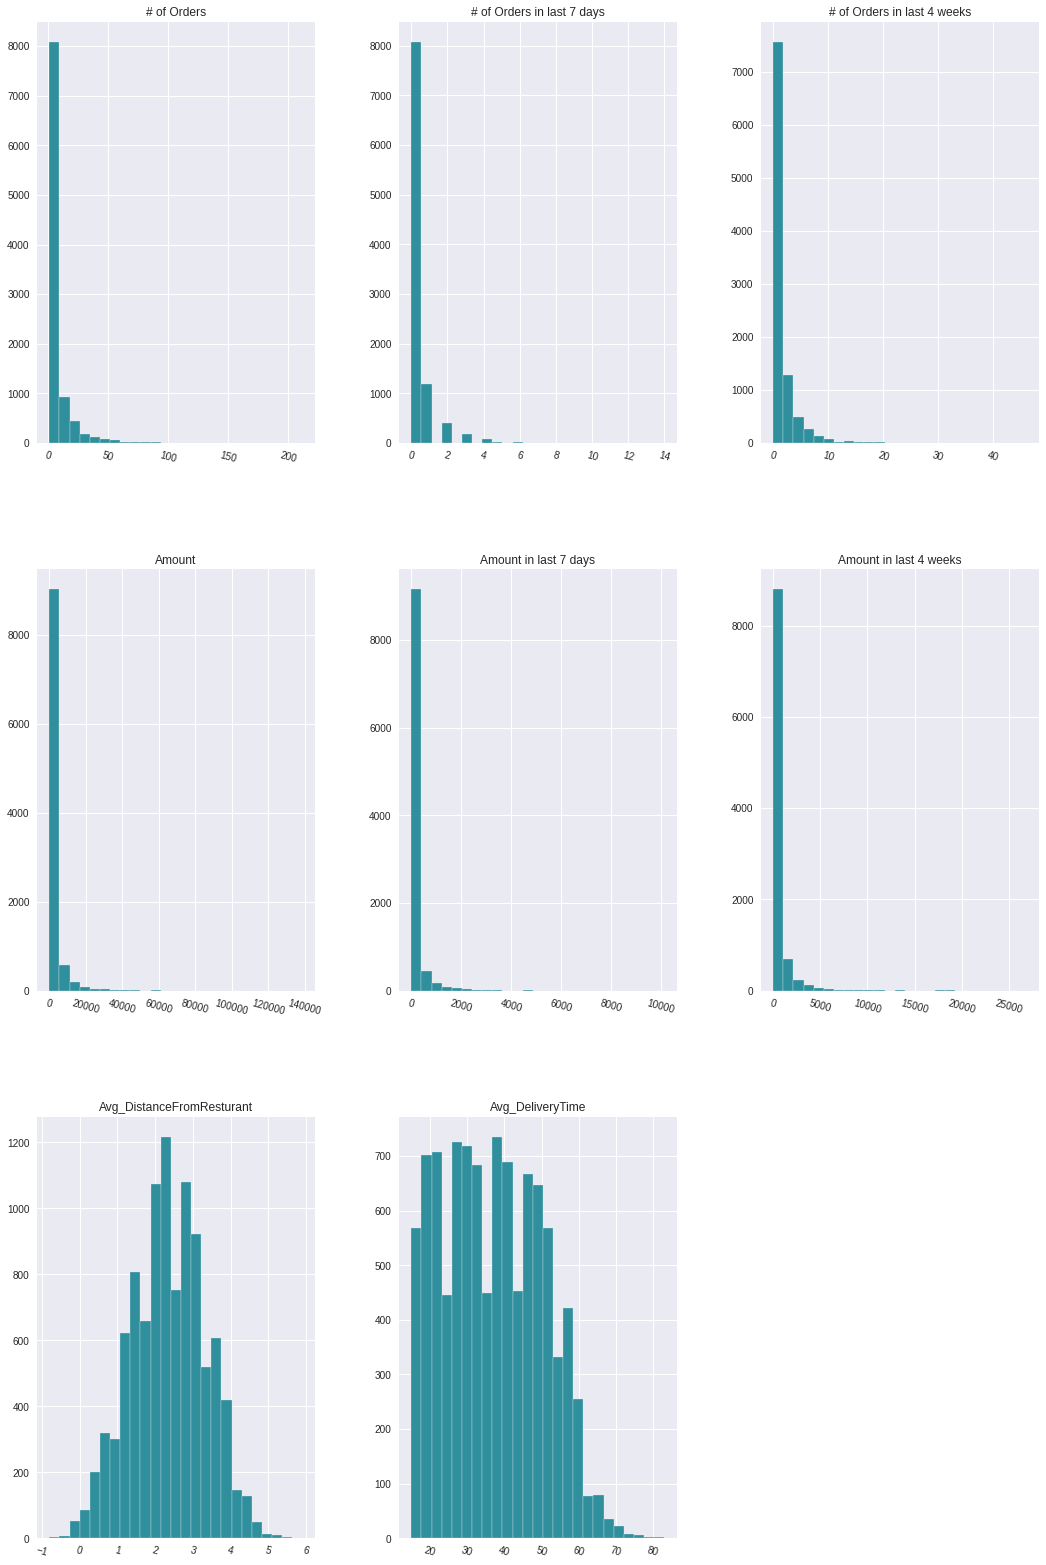

In [ ]:
h = df.hist(bins=25,figsize=(16,26),xlabelsize='10',ylabelsize='10',xrot=-15,color='#2F8F9D')
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

In [ ]:
feat_num = list(df)

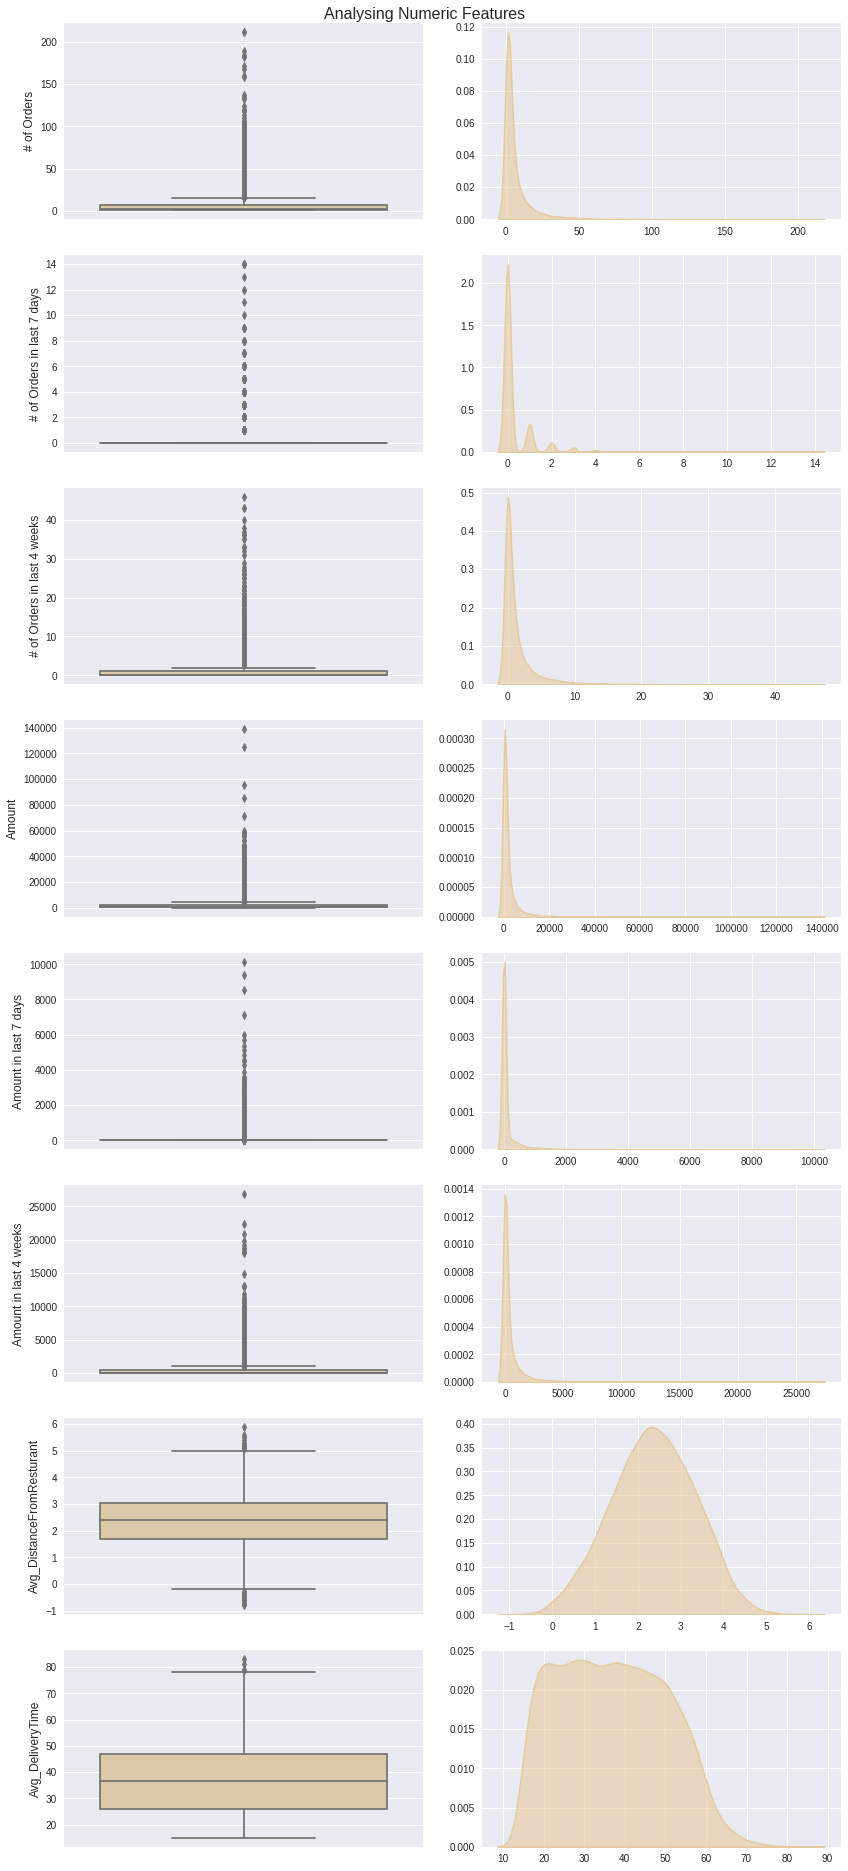

In [ ]:
#checking for outlier
numeric_var = df.select_dtypes(['int','float']).columns
plt.style.use('seaborn')
fig, axis = plt.subplots(len(numeric_var), 2, figsize = (12, 26))
for i, num_var in enumerate(numeric_var):
    
    # Checking for the outliers using boxplot
    sns.boxplot(y = num_var, data = df, ax = axis[i][0], color = '#E5CB9F')
    
    # Checking for the distribution using kdeplot
    sns.kdeplot(x = num_var, data = df, ax = axis[i][1], color = '#E5CB9F',
               fill = True, alpha = 0.6, linewidth = 1.5)
    
    axis[i][0].set_ylabel(f"{num_var}", fontsize = 12)
    axis[i][0].set_xlabel(None)
    axis[i][1].set_xlabel(None)
    axis[i][1].set_ylabel(None)

fig.suptitle('Analysing Numeric Features', fontsize = 16, y = 1)
plt.tight_layout()

## Correlation Matrix

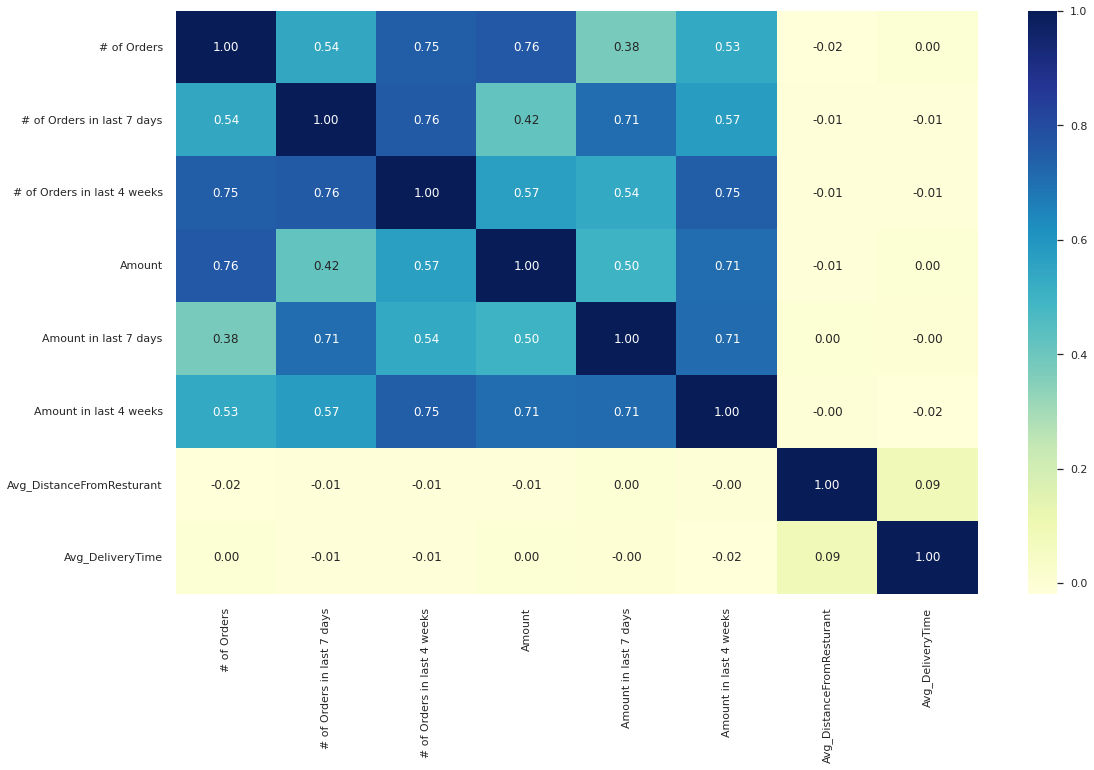

In [ ]:
corr_= df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "YlGnBu")

## Scaling

In [ ]:
sc_df = StandardScaler()
df_std = sc_df.fit_transform(df.astype(float))

# Modeling

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_std)

In [ ]:
df_data_std = pd.DataFrame(data=df_std, columns=list(df))

In [ ]:
df_data_std['clusters'] = kmeans.labels_
df['clusters'] = kmeans.labels_

In [ ]:
df.head(3)

,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime,clusters
0,212,6.0,43.0,138808,4291,26853,1.6,51,0
1,211,8.0,19.0,56404,1925,4177,2.2,42,0
2,189,9.0,33.0,36020,1772,6404,2.5,57,0


# Evaluasi

## Inertia

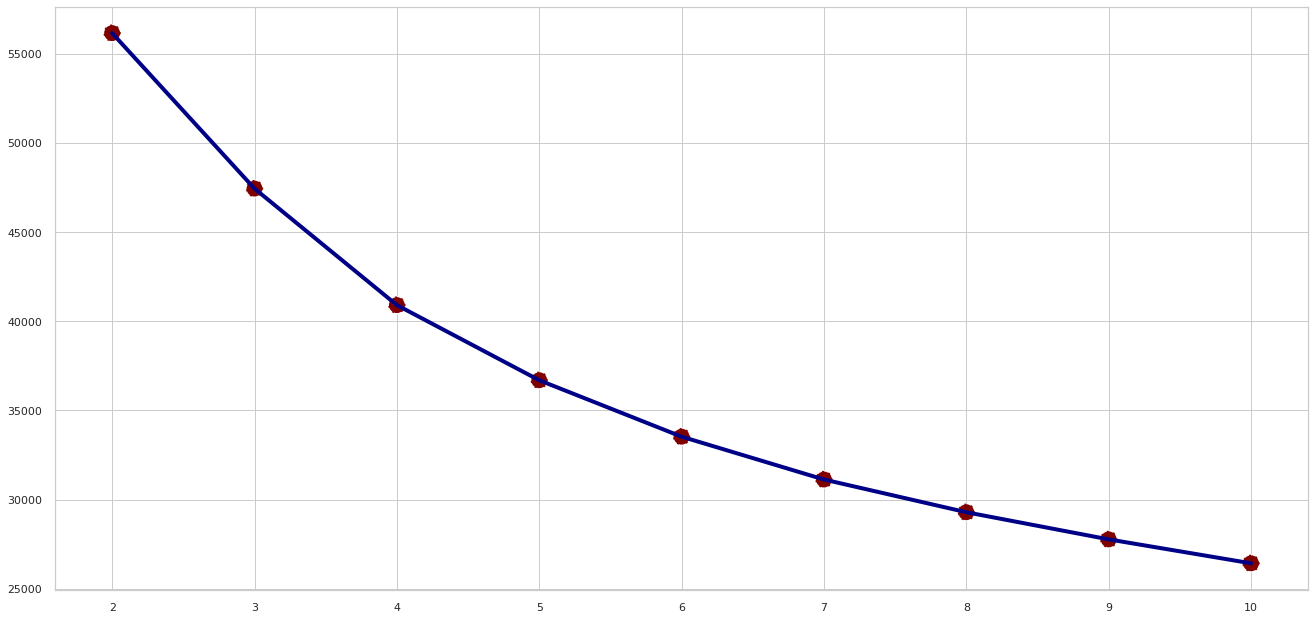

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')


## Silhouette score

In [ ]:
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
arr_silhouette_score_mahalanobis = []
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_std)
    preds = kmeans.predict(df_std)
    
    score_mahalanobis = silhouette_score(df_std, preds, metric='mahalanobis')
    arr_silhouette_score_mahalanobis.append(score_mahalanobis)
    
    score_euclidean = silhouette_score(df_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

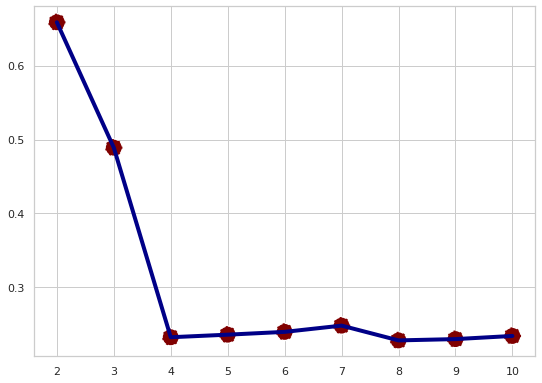

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

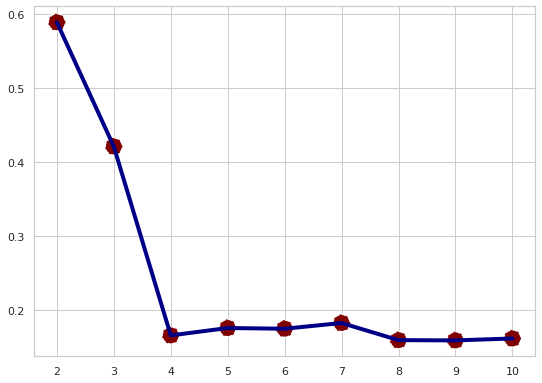

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_mahalanobis, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_mahalanobis, s=300, color='#800000',  linestyle='--')

# Insight

In [ ]:
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['clusters'] = df['clusters']
df_pca.head()

,PC 1,PC 2,clusters
0,38.460417,0.633729,0
1,19.317278,0.265167,0
2,20.161295,1.219760,0
3,18.469550,1.499601,0
4,21.306332,0.158005,0


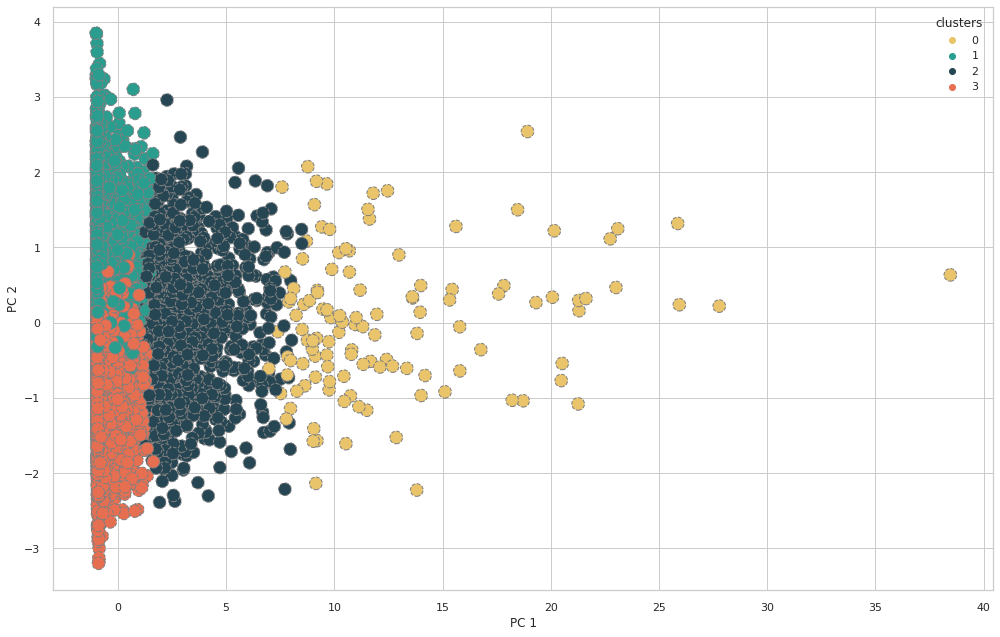

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='gray',
    linestyle='--',
    data=df_pca,
    palette=['#e9c46a','#2a9d8f','#264653','#e76f51'],
    s=160,
    ax=ax
)

In [ ]:
display(df.groupby('clusters').agg(['mean','median']))

# of Orders        # of Orders in last 7 days         \
                mean median                       mean median   
clusters                                                        
0          70.450000   59.5                   4.391667    4.0   
1           4.210539    2.0                   0.109847    0.0   
2          23.841808   19.0                   1.690207    2.0   
3           4.034548    2.0                   0.119347    0.0   

         # of Orders in last 4 weeks               Amount           \
                                mean median          mean   median   
clusters                                                             
0                          16.800000   14.5  31470.791667  28259.5   
1                           0.608115    0.0   1267.041811    567.0   
2                           5.980226    5.0   7398.452919   5565.5   
3                           0.639866    0.0   1209.736390    558.5   

         Amount in last 7 days         Amount in last 4 weeks          \
                          mean  median                   mean  median   
clusters                                                                
0                  2094.275000  1708.0            7797.675000  6715.5   
1                    25.706086     0.0             177.040079     0.0   
2                   570.287194   418.5            1896.592279  1550.5   
3                    28.080611     0.0             186.225712     0.0   

         Avg_DistanceFromResturant        Avg_DeliveryTime         
                              mean median             mean median  
clusters                                                           
0                         2.286667    2.2        35.691667   33.5  
1                         2.724641    2.8        48.313706   48.0  
2                         2.323729    2.3        36.862524   37.0  
3                         2.053350    2.0        27.309045   27.0

# Exploratory Data Analysis (EDA) with Clusters

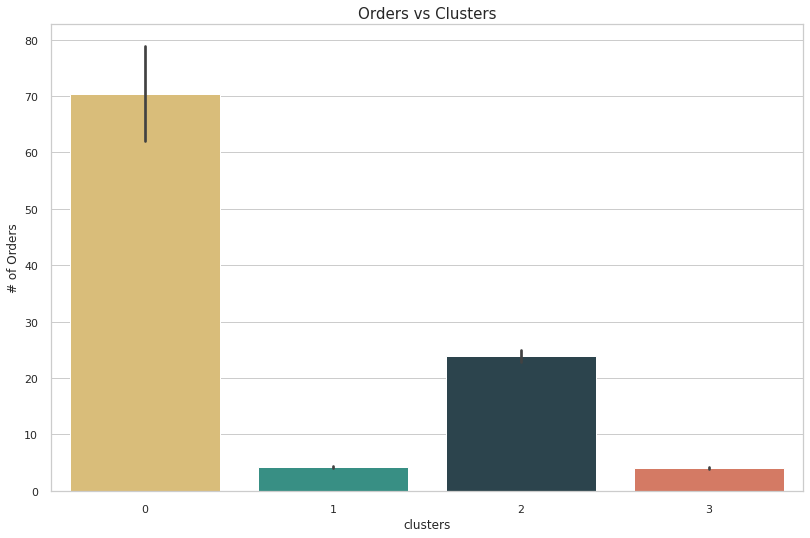

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x=df["clusters"], y=df["# of Orders"], palette = ['#e9c46a','#2a9d8f','#264653','#e76f51'])
plt.title("Orders vs Clusters", size=15)
plt.show()

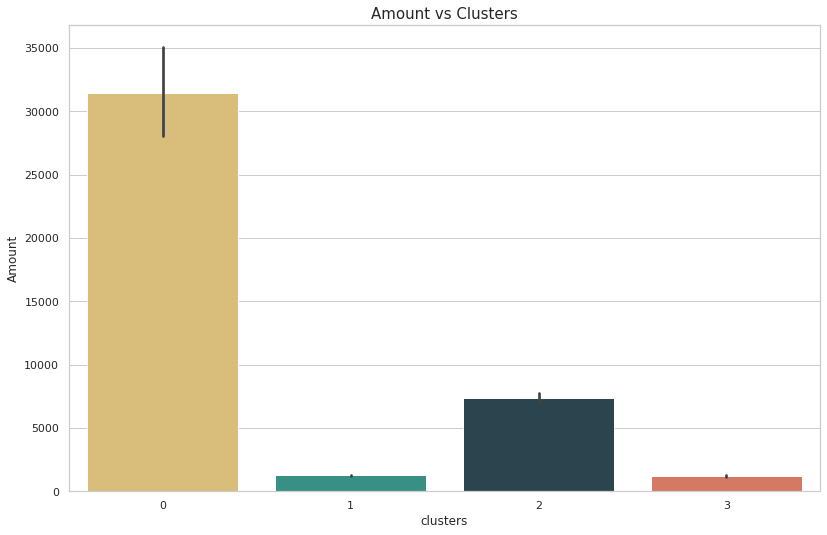

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x=df["clusters"], y=df["Amount"], palette = ['#e9c46a','#2a9d8f','#264653','#e76f51'])
plt.title("Amount vs Clusters", size=15)
plt.show()

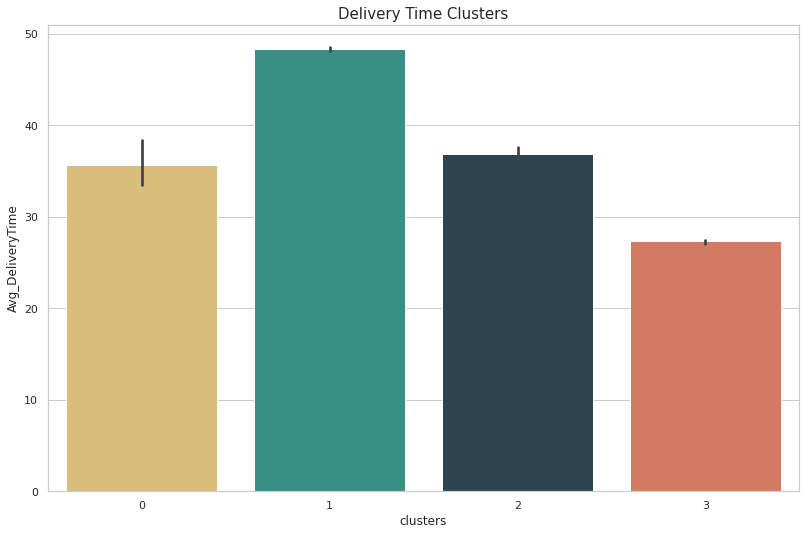

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8)) 
sns.barplot(x=df["clusters"], y=df["Avg_DeliveryTime"], palette = ['#e9c46a','#2a9d8f','#264653','#e76f51'])
plt.title("Delivery Time Clusters", size=15)
plt.show()

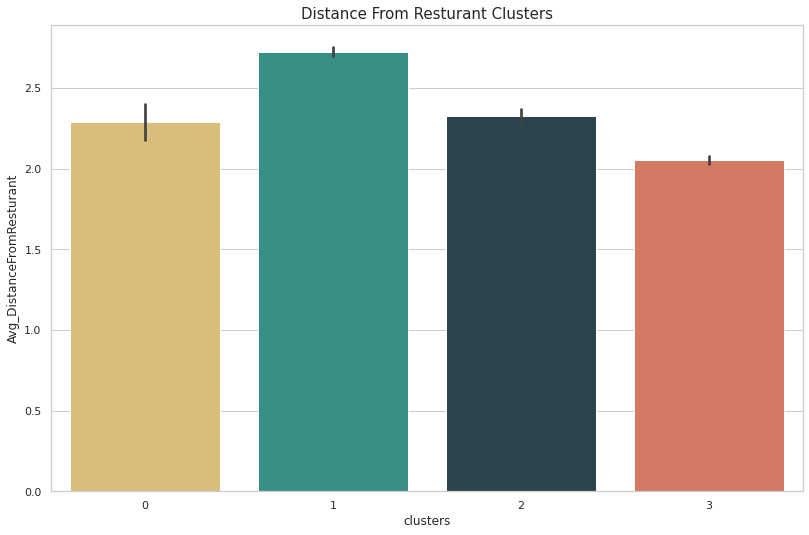

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8)) 
sns.barplot(x=df["clusters"], y=df["Avg_DistanceFromResturant"], palette = ['#e9c46a','#2a9d8f','#264653','#e76f51'])
plt.title("Distance From Resturant Clusters", size=15)
plt.show()